### Business Objective of the Project:

Understand and gain insights from an e-Commerce dataset, by performing various exploratory data analysis, data visualization, and data modelling tasks.
Focus specifically on Customer Behavior Analysis (notions, applications, etc.)
Perform Advanced Data Science Analysis

**Dataset Columns:**

 1  Account length                        
 2  location code                         
 3  user id                               
 4  credit card info save                
 5  push status                          
 6  add to wishlist                       
 7  desktop sessions                      
 8  app sessions                          
 9  desktop transactions                  
 10  total product detail views            
 11  session duration                     
 12  promotion clicks                      
 13  avg order value                      
 14  sale product views                    
 15  discount rate per visited products   
 16  product detail view per app session  
 17  app transactions                      
 18  add to cart per session              
 19  customer service calls               
 20  churn                                


### 1. Data Preprocessing and cleaning:    

**1.1 Import necessary libraries and read dataset:**

In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

**Importing dataset**

In [2]:
df = pd.read_csv("Customer_Behavior_Data.csv", delimiter = ';')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
account length,128,107,137,84,75,118,121,147,117,141
location code,415,415,415,408,415,510,510,415,408,415
user id,3824657,3717191,3581921,3759999,3306626,3918027,3559993,3299001,3354719,3308173
credit card info save,no,no,no,yes,yes,yes,no,yes,no,yes
push status,yes,yes,no,no,no,no,yes,no,no,yes
add to wishlist,25,26,0,0,0,0,24,0,0,37
desktop sessions,265,162,243,299,167,223,218,157,185,259
app sessions,45,27,41,51,28,38,37,27,31,44
desktop transactions,17,17,10,5,13,19,30,9,30,19
total product detail views,110,123,114,71,113,98,88,79,97,84


### STATISTICAL ANALYSIS

**Display summary of dataset structure and data types**

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

**Changing data types of numeric columns from object data type to integer data type**

In [3]:
# Remove commas and convert to integers
df['add to cart per session'] = df['add to cart per session'].str.replace(',', '.').astype(float)
df['product detail view per app session'] = df['product detail view per app session'].str.replace(',', '.').astype(float)
df['discount rate per visited products'] = df['discount rate per visited products'].str.replace(',', '.').astype(float)
df['avg order value'] = df['avg order value'].str.replace(',', '.').astype(float)

In [4]:
#Dropping user id column
df = df.drop(['user id'],axis=1)

#Changing encoding of categorical columns
df['credit card info save'] = df['credit card info save'].replace('no',0)
df['credit card info save'] = df['credit card info save'].replace('yes',1)

df['push status'] = df['push status'].replace('no',0)
df['push status'] = df['push status'].replace('yes',1)

**Checking to ensure data types have been changed.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   credit card info save                3333 non-null   int64  
 3   push status                          3333 non-null   int64  
 4   add to wishlist                      3333 non-null   int64  
 5   desktop sessions                     3333 non-null   int64  
 6   app sessions                         3333 non-null   int64  
 7   desktop transactions                 3333 non-null   int64  
 8   total product detail views           3333 non-null   int64  
 9   session duration                     3333 non-null   int64  
 10  promotion clicks                     3333 non-null   int64  
 11  avg order value               

**3. Checking for missing values**

In [6]:
#Checking missing values
missing_values = df.isnull().sum()
missing_values

account length                         0
location code                          0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64

**There are no missing values in the dataset.**

**4. Checking for duplicates.**

In [7]:
duplicates = df[df.duplicated()]
duplicates

,account length,location code,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn


**There are no duplicates in the dataset**

### 5.Searching for outliers

In [8]:
df.describe()

,account length,location code,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


**We can observe some outliers in session duration, average order value, promotion clicks, sale product views, app transactions, account length, 
add to wish list, desktop sessions, and customer service calls.**

**Visualizing the outliers using histograms**

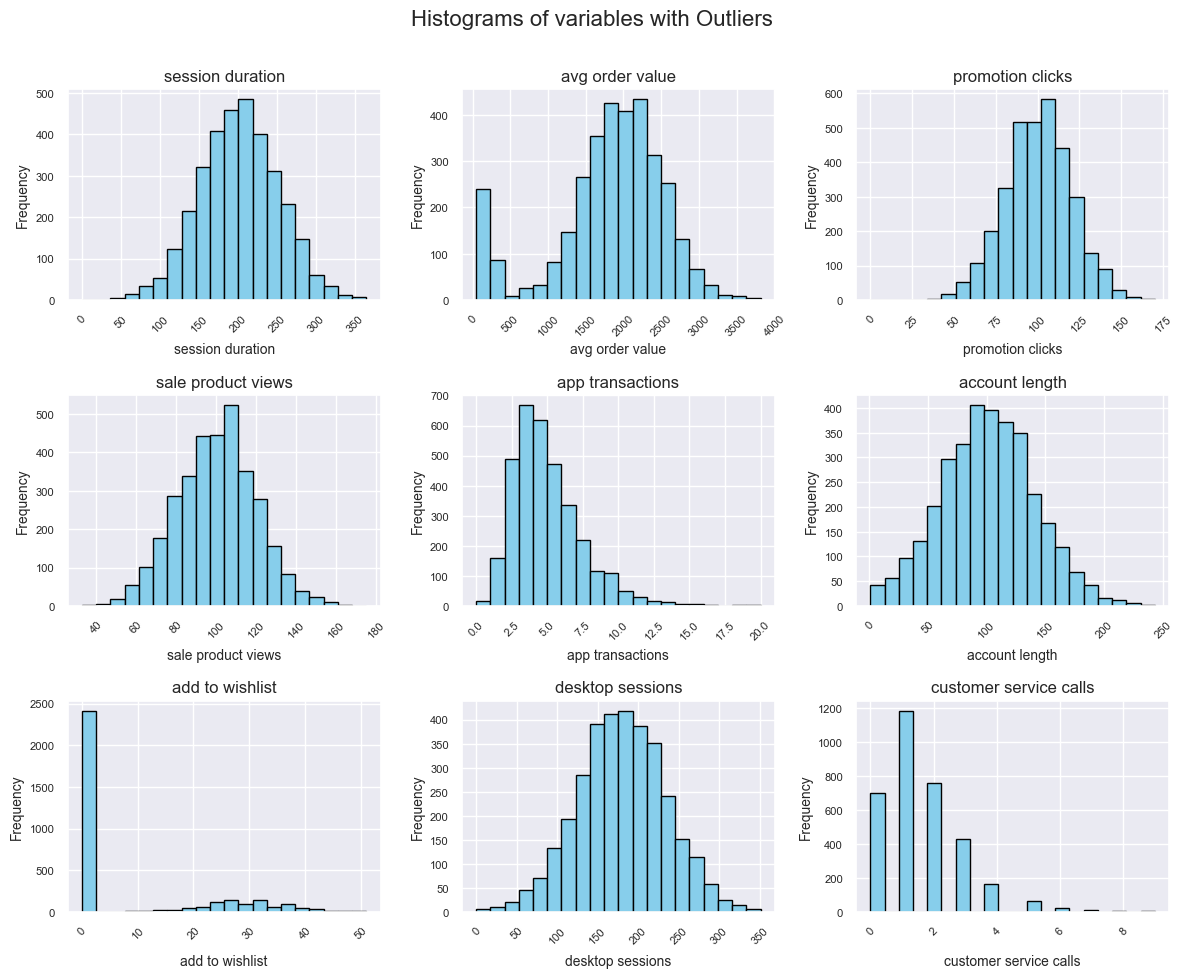

In [181]:
variables = ['session duration', 'avg order value', 'promotion clicks', 'sale product views',
             'app transactions', 'account length', 'add to wishlist', 'desktop sessions',
             'customer service calls']

# Create subplots for the histograms
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Histograms of variables with Outliers', fontsize=16)

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.hist(df[variable], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(variable, fontsize=12)
    ax.set_xlabel(variable, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)
    ax.get_xaxis().set_label_coords(0.5, -0.2)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# Hide any remaining empty subplots
for j in range(i+1, 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


**From the histogram, the outliers do not appear to be errors.They are consisent with the nature of the dataset**

### 6. Repeat with the rest of the variables

**Visualizing the outliers using boxplot**

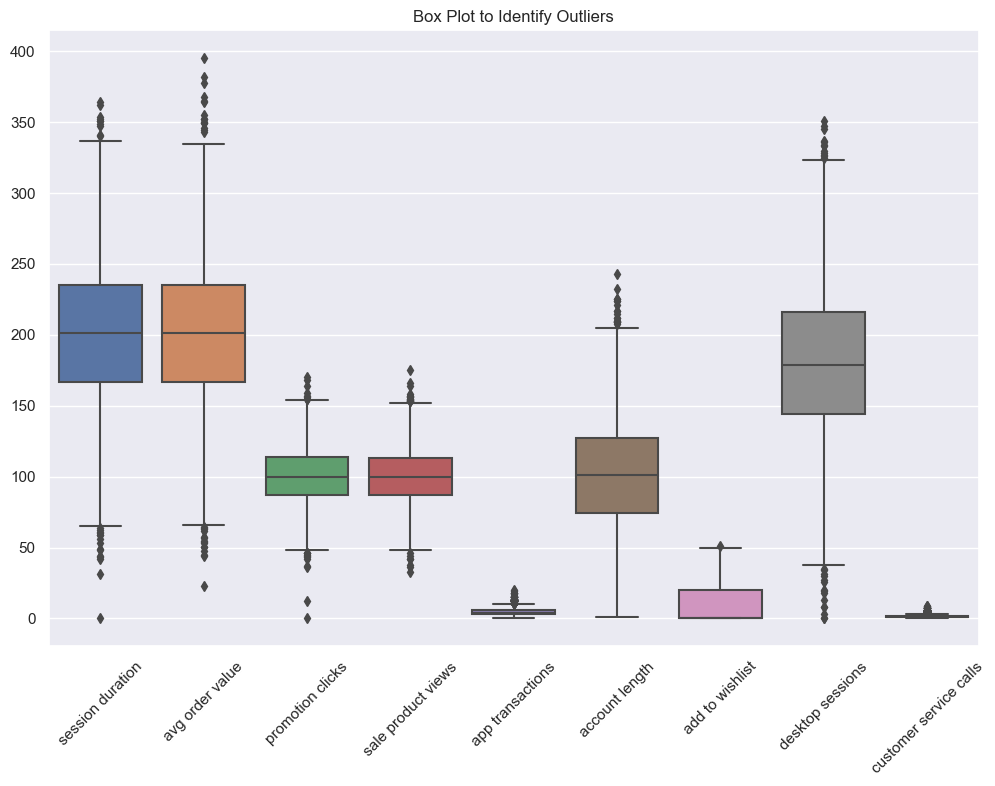

In [9]:

ncol = ['session duration', 'avg order value', 'promotion clicks', 'sale product views',
        'app transactions', 'account length', 'add to wishlist', 'desktop sessions',
        'customer service calls']

# Create the box plot with rotated x-axis labels
sns.set(rc={'figure.figsize': (12, 8)})  # Set the figure size
box_plot = sns.boxplot(data=df[ncol])
plt.title("Box Plot to Identify Outliers")

# Rotate the x-axis labels at a 45-degree angle
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)

plt.show()

**The box plot  shows that the 'Average Order Value' variable has the most outliers,the outliers in the other variables are not very obvious.**

**To check for the outliers in the upperbound of the IQR.**  

**Retrieving the rows in the upper bound of the IQR, checking for any anormalies.** 

In [183]:
# Calculate the IQR for 'avg order value'
q1 = df['avg order value'].quantile(0.25)
q3 = df['avg order value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Retrieve rows with 'avg order value' values greater than the upper bound
upper_bound_outliers_df = df[df['avg order value'] > upper_bound]
upper_bound_outliers_df

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
244,108,408,3351697,no,no,0,199,34,23,99,268,60,3549,75,1597,94,3,254,0,1
444,85,408,3815878,yes,no,0,165,28,17,107,196,126,3492,110,1571,96,7,259,2,0
922,80,415,3985006,no,no,0,240,41,12,121,142,51,3643,106,1639,93,5,251,1,0
1202,86,415,3853111,no,no,0,84,14,19,96,221,63,3497,75,1574,126,3,34,0,0
1238,147,415,3655682,yes,yes,24,220,37,18,118,209,116,3525,111,1586,81,4,219,3,0
1317,89,415,4206414,no,yes,29,164,28,23,80,275,136,3819,147,1719,75,5,203,2,0
1445,55,510,3317342,no,yes,8,223,38,15,104,172,94,3775,114,1699,97,2,262,1,0
2321,153,408,3393636,no,no,0,155,26,22,56,263,84,3677,89,1655,155,2,419,1,0
2754,96,415,3834641,no,yes,23,183,31,13,88,147,89,3502,108,1576,113,7,305,1,0
3060,94,415,3713236,no,no,0,212,36,16,98,189,89,3522,95,1585,84,5,227,3,0


**Retrieving the rows in the lower bound of the IQR, checking for any anormalies**

In [184]:
# Calculate the IQR for 'avg order value'
q1 = df['avg order value'].quantile(0.25)
q3 = df['avg order value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Retrieve rows with 'avg order value' values less than the lower bound
lower_bound_outliers_df = df[df['avg order value'] < lower_bound]
lower_bound_outliers_df

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
11,74,415,3449403,no,no,0,188,32,14,127,163,148,196,94,882,91,5,246,0,0
14,62,415,3669238,no,no,0,121,21,26,70,307,76,203,99,914,131,6,354,4,0
24,132,510,3434696,no,no,0,81,14,21,86,245,72,237,115,1067,103,2,278,0,0
51,60,408,4205645,no,no,0,221,38,18,57,211,115,249,129,1121,68,3,184,1,0
62,74,510,3445117,no,yes,33,194,33,21,91,246,96,138,92,621,146,3,394,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,139,415,3762408,no,yes,43,231,39,19,85,222,82,148,105,666,83,5,224,2,0
3282,99,415,4025076,no,yes,31,244,42,17,71,203,58,234,115,1053,77,4,208,3,0
3291,119,510,3357324,yes,yes,22,172,29,19,119,224,133,150,94,675,139,20,375,1,1
3294,116,408,3711139,no,no,0,51,9,18,106,209,137,198,92,891,123,3,332,1,0


**No errors can be seen from the rows in upper and lower bound of the IQR.**

**We will take a further step to check for errors in the upper and lower bounds of the IQR using Using K Means clustering.
The Average order value column has the most outliers, we will apply the K-Means clustering to visualize the outliers to ensure they are not errors.**


C:\Users\trail\anaconda3\envs\DAB200\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


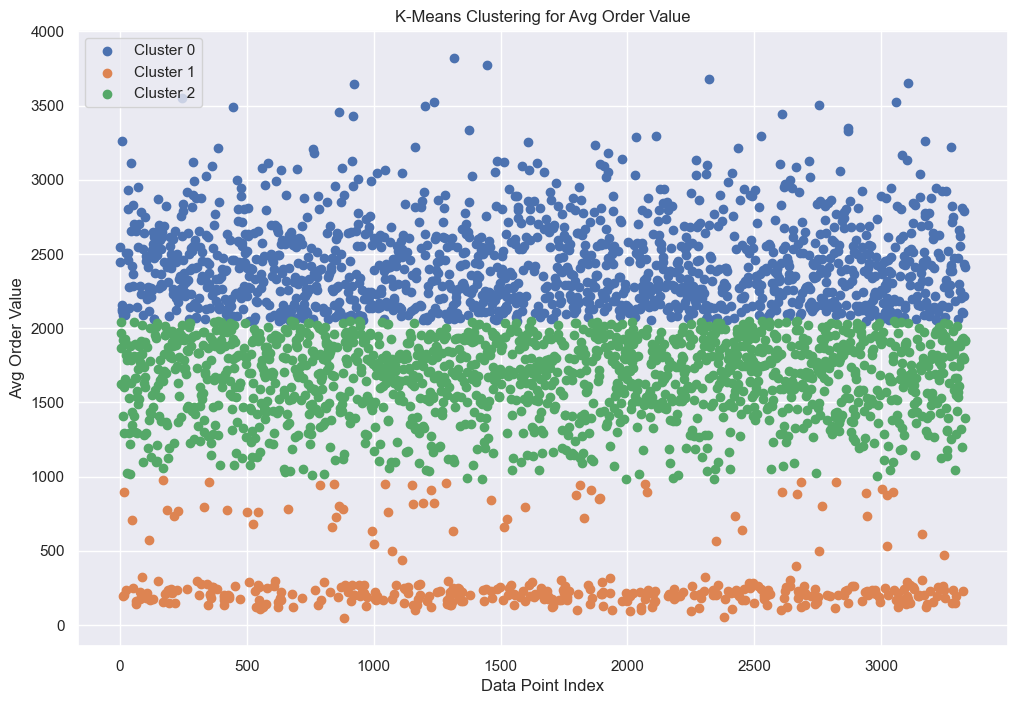

In [16]:
# Select only the 'avg order value' column
selected_column = df[['avg order value']]

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(selected_column)

# Visualize the clusters
for cluster in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['avg order value'], label=f'Cluster {cluster}')

plt.xlabel('Data Point Index')
plt.ylabel('Avg Order Value')
plt.title('K-Means Clustering for Avg Order Value')
plt.legend()
plt.show()


**The outliers appear normal, no anormally is seen.
The outliers represent natural variations as in e-commerce we expect such variations, making the outliers "True outliers".**

## 7. Conclusions based on visualisations

**All of the numerical variables in the dataset has outliers from a statistical point of view. What is apparent is that all of the outliers represent natural variations as in e-commerce we expect such variations, making the outliers "True outliers".**

## 8. Analysis of the Dependent variable (Churn) vs Independent variables

### Checking the proportion of Churned and Not Churned customers

**8.1 Analysing the the average account length for churned and not churned customers**

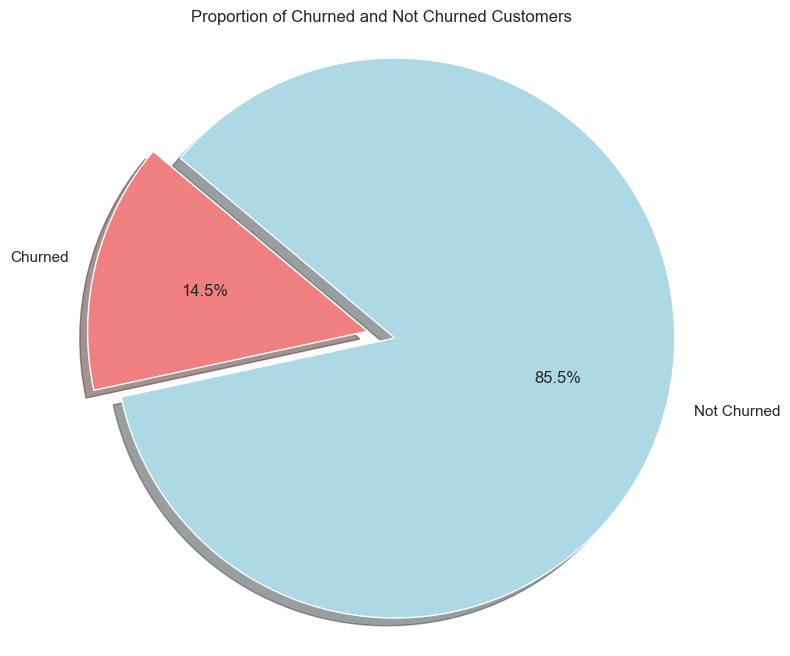

In [186]:
# Calculate the count of churned and not churned customers
churned_count = len(df[df['churn'] == 1])
not_churned_count = len(df[df['churn'] == 0])

# Create data for the pie chart
labels = ['Churned', 'Not Churned']
sizes = [churned_count, not_churned_count]
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)  # Explode the "Churned" slice

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Churned and Not Churned Customers')

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

**8.2 Analyzing the Account Account length by Churn**

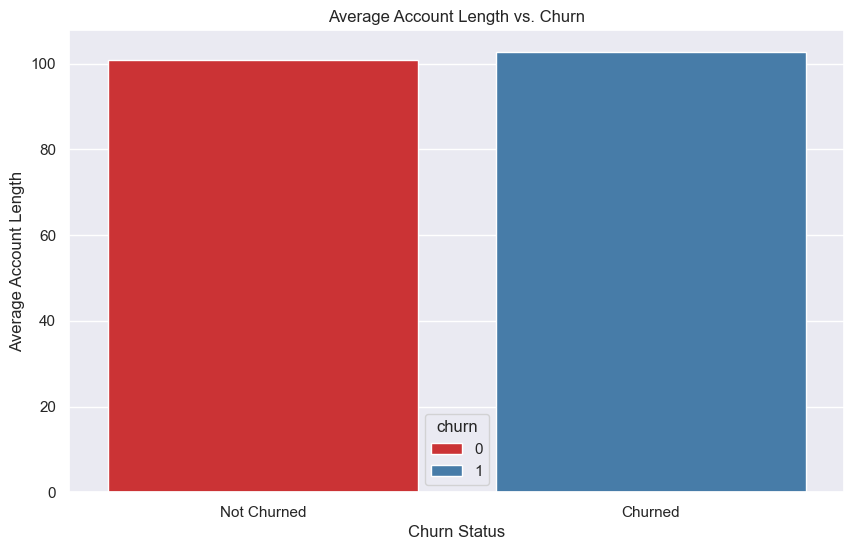

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average account length for churned and non-churned customers
average_account_length = df.groupby('churn')['account length'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='churn', y='account length', data=average_account_length, hue='churn', palette='Set1', dodge=False)
plt.title('Average Account Length vs. Churn')
plt.xlabel('Churn Status')
plt.ylabel('Average Account Length')
plt.xticks([0, 1], ['Not Churned', 'Churned'])

plt.show()

**From this bar chart we can see that Account Length doesn't affect churn. The number of people who churned and the people who did not churn are nearly same
for the various account lengths**

**8.3 Analysing Customer Srvice Calls by churn**

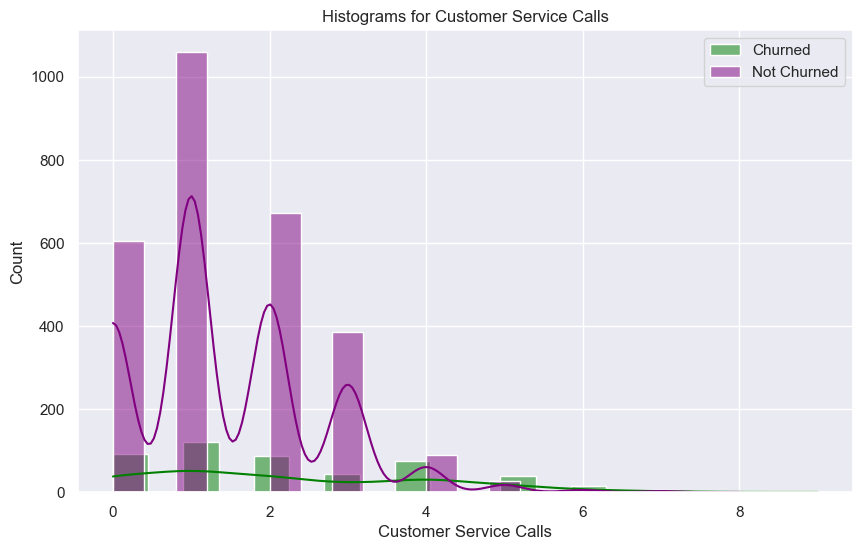

In [188]:
# Create separate DataFrames for churned and non-churned customers
churned_customers = df[df['churn'] == 1]
non_churned_customers = df[df['churn'] == 0]

# Set up the figure and axis
plt.figure(figsize=(10, 6))
plt.title('Histograms for Customer Service Calls')

# Plot histograms for "customer service calls" for churned and non-churned customers
sns.histplot(data=churned_customers, x='customer service calls', label='Churned', kde=True, color='green', bins=20)
sns.histplot(data=non_churned_customers, x='customer service calls', label='Not Churned', kde=True, color='purple', bins=20)

# Add labels and legend
plt.xlabel('Customer Service Calls')
plt.legend()

# Show the plot
plt.show()

**From the histogram we can see a positive relationship between customer service calls and churn. Customers who made more calls to Customer service did not churn.**

**8.4 Histograms to compare "Discount Rate per Visited Products" and "Customer Service Calls" for churned and non-churned customers.**

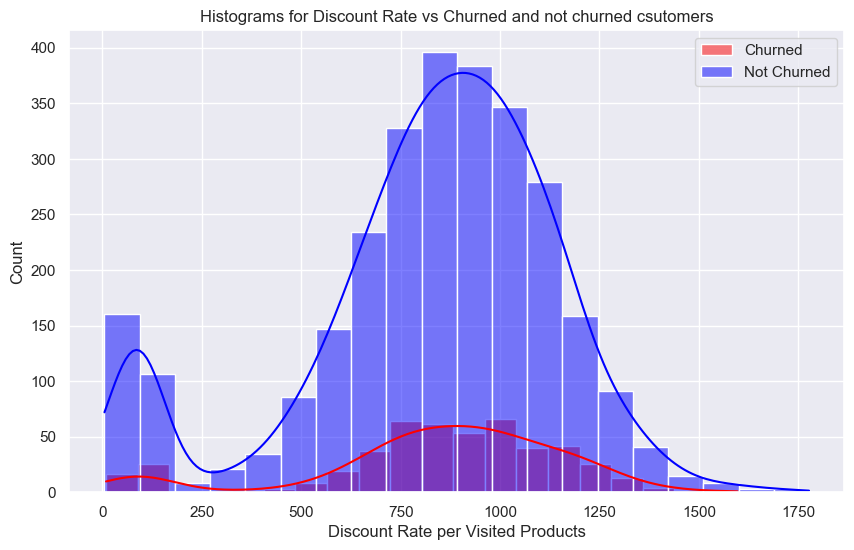

In [189]:
# Create separate DataFrames for churned and non-churned customers
churned_customers = df[df['churn'] == 1]
non_churned_customers = df[df['churn'] == 0]

# Set up the figure and axis
plt.figure(figsize=(10, 6))
plt.title('Histograms for Discount Rate vs Churned and not churned csutomers')

# Plot histograms for "discount rate per visited products" for churned and non-churned customers
sns.histplot(data=churned_customers, x='discount rate per visited products', label='Churned', kde=True, color='red', bins=20)
sns.histplot(data=non_churned_customers, x='discount rate per visited products', label='Not Churned', kde=True, color='blue', bins=20)

# Add labels and legend
plt.xlabel('Discount Rate per Visited Products')
plt.legend()

# Show the plot
plt.show()


**From the histogram we can see a positive relationship between discount rate per visited products and churn. Customers who had high discount rate per visited product did not churn.**

## 9. Plot Churn against the categorical data

**9a. Analysing the churned and not churned customers by location code.**

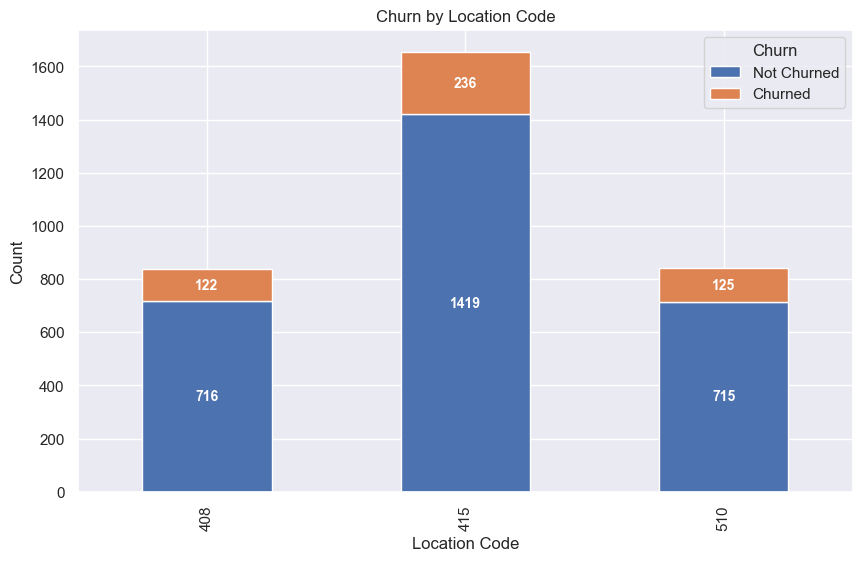

In [11]:
# Create a contingency table
contingency_table = pd.crosstab(df['location code'], df['churn'])

# Create a stacked bar chart
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn by Location Code')
plt.xlabel('Location Code')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Add counts inside the bars
for i in ax.containers:
    ax.bar_label(i, label_type='center', fontsize=10, color='white', weight='bold')

plt.show()

**From the chart above we can see that the churned and not churned customers are evenly distributed in all locations. 'Location code' 415 appears to have the highest number, but that is because the number of customers in that location is twice the number of customers in the other location codes.**

**9b. Analysing credit card info save vs Churn**

<Figure size 800x600 with 0 Axes>

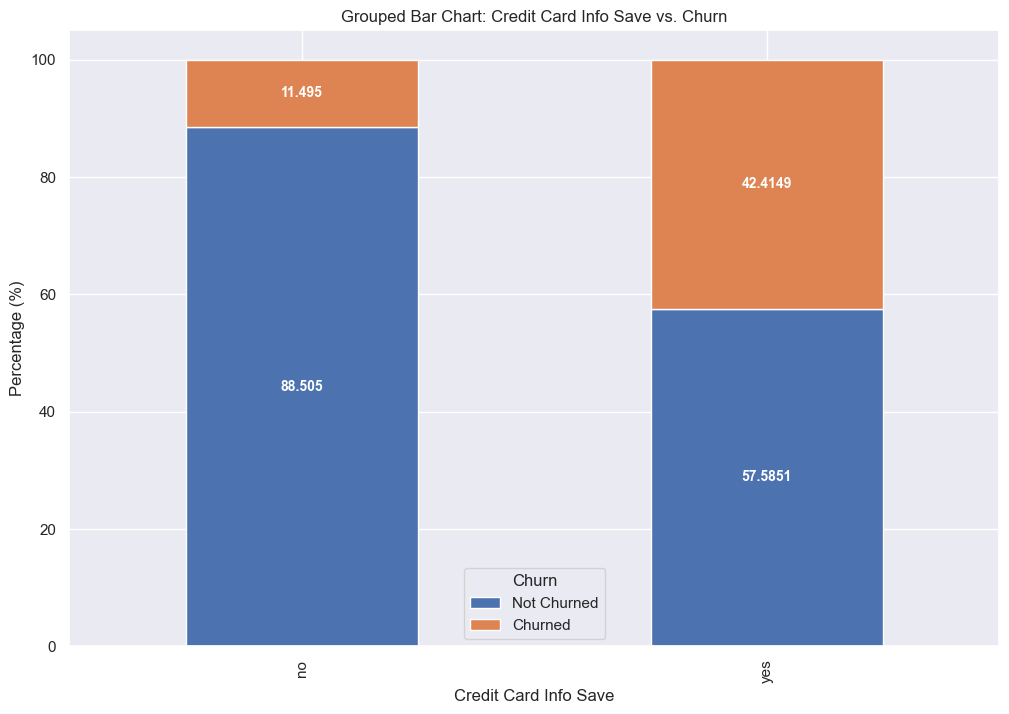

In [191]:

# Create a contingency table
contingency_table = pd.crosstab(df["credit card info save"], df["churn"], normalize='index') * 100

# Create a grouped bar chart with percentages inside the bars
plt.figure(figsize=(8, 6))
ax = contingency_table.plot(kind='bar', stacked=True)
plt.title('Grouped Bar Chart: Credit Card Info Save vs. Churn')
plt.xlabel('Credit Card Info Save')
plt.ylabel('Percentage (%)')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Add percentages inside the bars
for i in ax.containers:
    ax.bar_label(i, label_type='center', fontsize=10, color='white', weight='bold')

plt.show()


**We can see from the analysis that 88.50% of customers did not save their credit card info and these customers churned.** 

**Customers with their credit card information saved on the side are far less likely to be churn than customers without their credit card info saved. This means that if the shop motivates people to save their credit card info might minimize churns.
This makes sense since customers who trust their credit card info on a side indicate that they trust the brand. More trust less chances of customers leaving your business.**

**9c. Calculate the correlation matrix beween push status and churn**

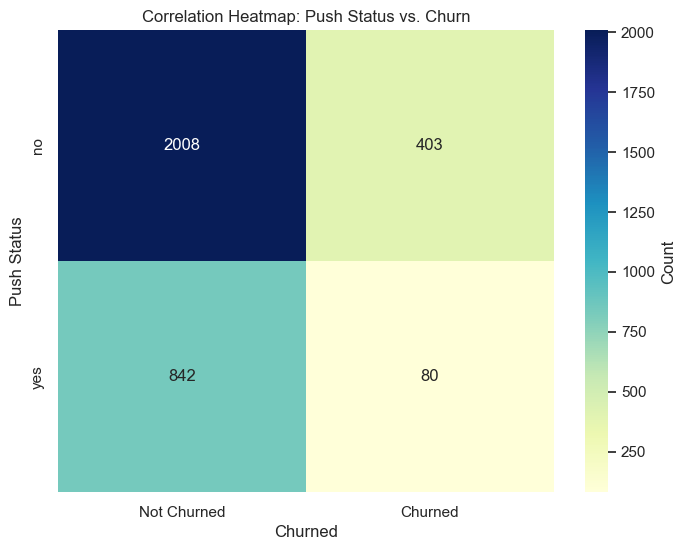

In [195]:
# Create a contingency table
contingency_table = pd.crosstab(df['push status'], df['churn'])

# Create a heatmap with counts
plt.figure(figsize=(8, 6))
ax = sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title('Correlation Heatmap: Push Status vs. Churn')
plt.xlabel('Churned')
plt.ylabel('Push Status')

# Customize the x-axis labels
ax.set_xticklabels(['Not Churned', 'Churned'])

plt.show()



**The heatmap shows that majority of customers don't allow push notifications**

## 9.1 Observations from the categorical columns plots

**Majority of customers are in location code 415**

**Majority of customers don't allow push notifications**

**Majority of customers don't store their credit card information on the side**

## 9.2 Observations from plotting categorical data against Churn

**The location codes have a similar percentage of churns, meaning that location might not be a strong indication for churn**

**Customers with push status activated are less likely to be churn, meaning that motivating customers to activate push status might help minimize churns**

**Customers with their credit card information saved on the side are far less likely to be churns than customers without their credit card info saved. This means that if the shop motivates people to save their credit card info might minimize churns.**

**This makes sense since customers who trust their credit card info on a side indicate that they trust the brand. More trust less chances of customers leaving your business.**

### Machine Learning Models

In [18]:
# Calculate the IQR for 'avg order value'
q1 = df['avg order value'].quantile(0.25)
q3 = df['avg order value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Retrieve rows with 'avg order value' values greater than the upper bound
df = df[df['avg order value'] < upper_bound]

# Retrieve rows with 'avg order value' values less than the lower bound
df = df[df['avg order value'] > lower_bound]
len(df)

2996

In [19]:
df[['credit card info save','location code','push status','churn']] = df[['credit card info save','location code','push status','churn']].astype(object).astype('category')

In [26]:
#Label Encoding
from sklearn import preprocessing
labelEncoderColumns = ['location code','push status']
label_encoder = preprocessing.LabelEncoder()
for cn in labelEncoderColumns:
    df[cn]= label_encoder.fit_transform(df[cn])

In [21]:
#Splitting data into train and test
X = df.drop(['churn'],axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [22]:
y_train.value_counts()

churn
0    2053
1     343
Name: count, dtype: int64

In [23]:
y_test.value_counts()

churn
0    521
1     79
Name: count, dtype: int64

In [25]:
# Running the random forest classifier model and taking the oob score
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 75, n_jobs=-1,oob_score=True)
rf1.fit(X_train,y_train)
score = rf1.oob_score_
score

0.9461602671118531

In [123]:
from sklearn.metrics import precision_score
preds = rf1.predict(X_test)
accuracy_score(y_test, preds)

0.9466666666666667

In [124]:
precision_score(y_test, preds)

0.9607843137254902

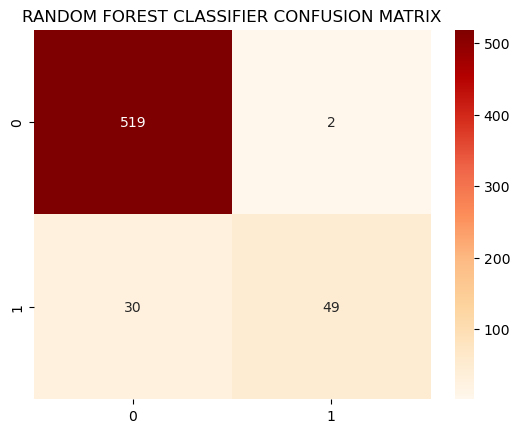

In [125]:
preds = rf1.predict(X_test)

cf_matrix = confusion_matrix(y_test, preds)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("RANDOM FOREST CLASSIFIER CONFUSION MATRIX")
plt.show()

Accuracy:  0.86


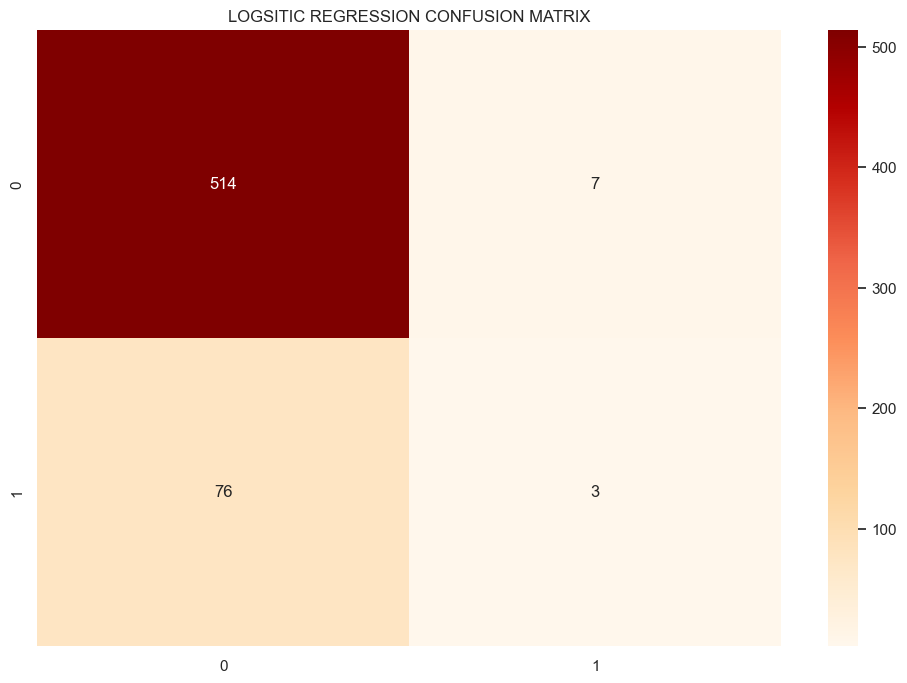

In [24]:
#Logistic Regression
clf = LogisticRegression(random_state=77)
clf.fit(X_train,y_train)
print("Accuracy: ", f"{clf.score(X_test,y_test):.2f}")
pred1 = clf.predict(X_test)

cf_matrix1 = confusion_matrix(y_test, pred1)
sns.heatmap(cf_matrix1 , annot=True,fmt = "d", cmap='OrRd')
plt.title("LOGSITIC REGRESSION CONFUSION MATRIX")
plt.show()

In [129]:
accuracy_score(y_test, pred1)

0.8616666666666667

In [127]:
precision_score(y_test, pred1)

0.3